In [ ]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
img = cv2.imread("/content/market_img.jpg")

print(img is None)

False


In [4]:
model = YOLO("yolov8n.pt")


0: 384x640 13 persons, 370.3ms
Speed: 21.8ms preprocess, 370.3ms inference, 53.8ms postprocess per image at shape (1, 3, 384, 640)


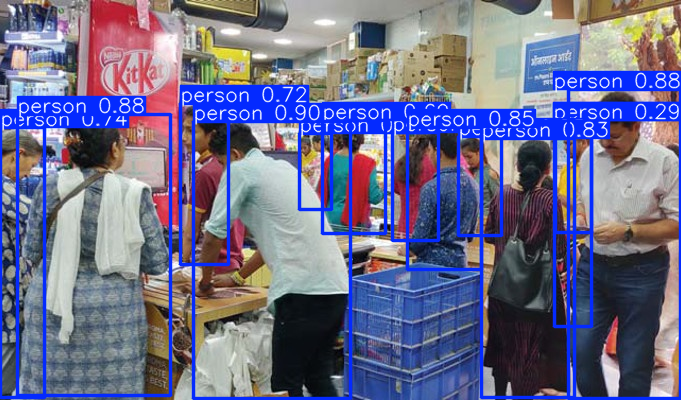

In [5]:
results = model(img, conf=0.2)

output = results[0].plot()
cv2_imshow(output)


0: 384x640 13 persons, 175.6ms
Speed: 4.4ms preprocess, 175.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


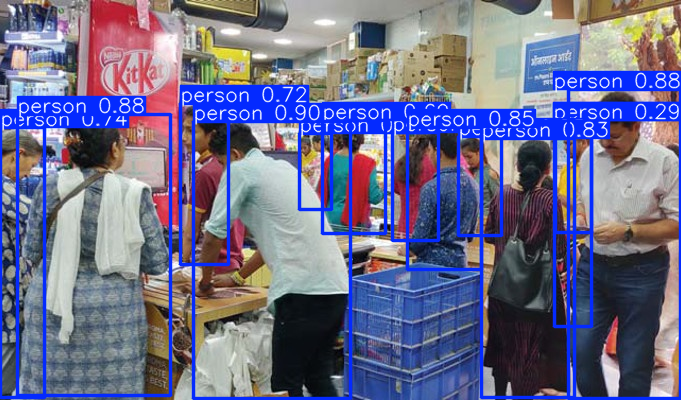

In [6]:
results = model(img, conf=0.2, classes=[0])  # class 0 = person

output = results[0].plot()
cv2_imshow(output)

In [7]:
from ultralytics import YOLO

pose_model = YOLO("yolov8n-pose.pt")


0: 384x640 11 persons, 167.2ms
Speed: 3.5ms preprocess, 167.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


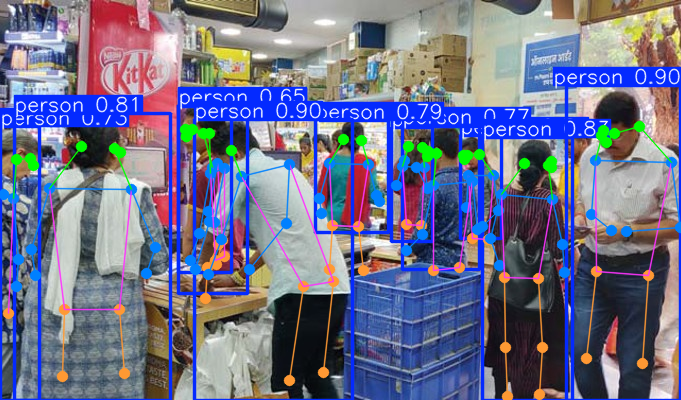

In [8]:
pose_results = pose_model(img, conf=0.3)

pose_output = pose_results[0].plot()
cv2_imshow(pose_output)

In [9]:
import numpy as np

kps = pose_results[0].keypoints.xy.cpu().numpy()

print("Detected persons:", len(kps))
print("Example wrist points:", kps[0][9], kps[0][10])


Detected persons: 11
Example wrist points: [     208.15      274.75] [     249.33         270]


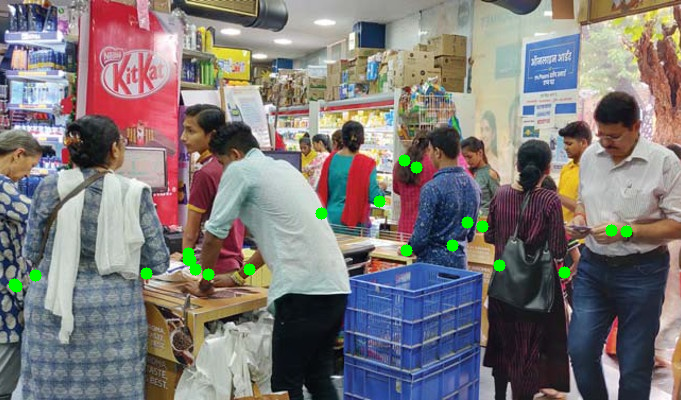

In [10]:
import cv2

debug_img = img.copy()

for person in kps:
    lw = person[9].astype(int)
    rw = person[10].astype(int)

    cv2.circle(debug_img, tuple(lw), 6, (0,255,0), -1)
    cv2.circle(debug_img, tuple(rw), 6, (0,255,0), -1)

cv2_imshow(debug_img)


In [11]:
import cv2

# pose_output already exists from previous step
cv2.imwrite("outputs/person_pose_detection.png", pose_output)

print("Image saved successfully")

Image saved successfully
